In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 2

Loading the Dataset and dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

In [4]:
data = get_data('iris')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The first 5 rows are then printed, which is equivalent to the output of the pandas
head() function.
data.info()


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Exploratory Data Analysis:is a fundamental part of every machine learning project, as it helps us understand the fundamental statistical properties of a dataset, by using visualizations.

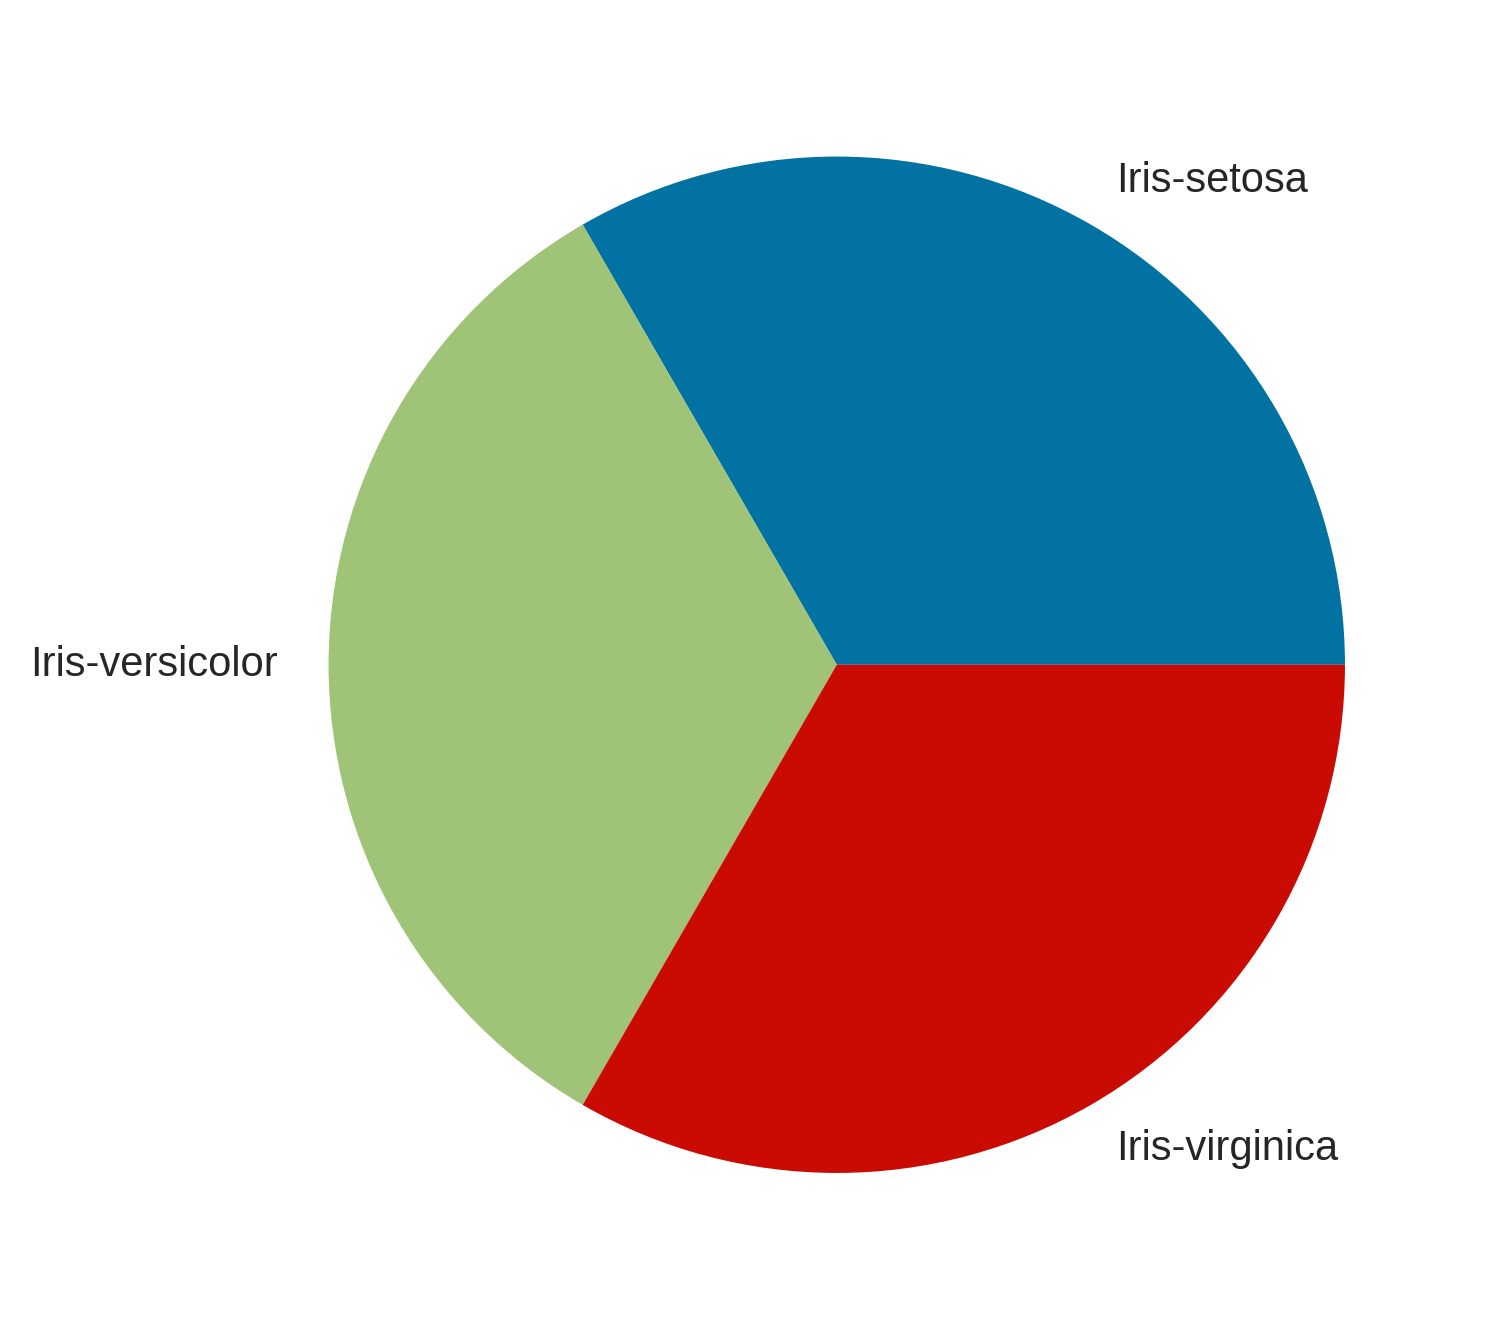

In [6]:
data['species'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


## The box plot is a type of graph that visualizes the distribution of numeric variables,in a way that enables comparisons between categories. Box plots show the quartiles of each variable, including the min, Q1, median, Q3 and max values

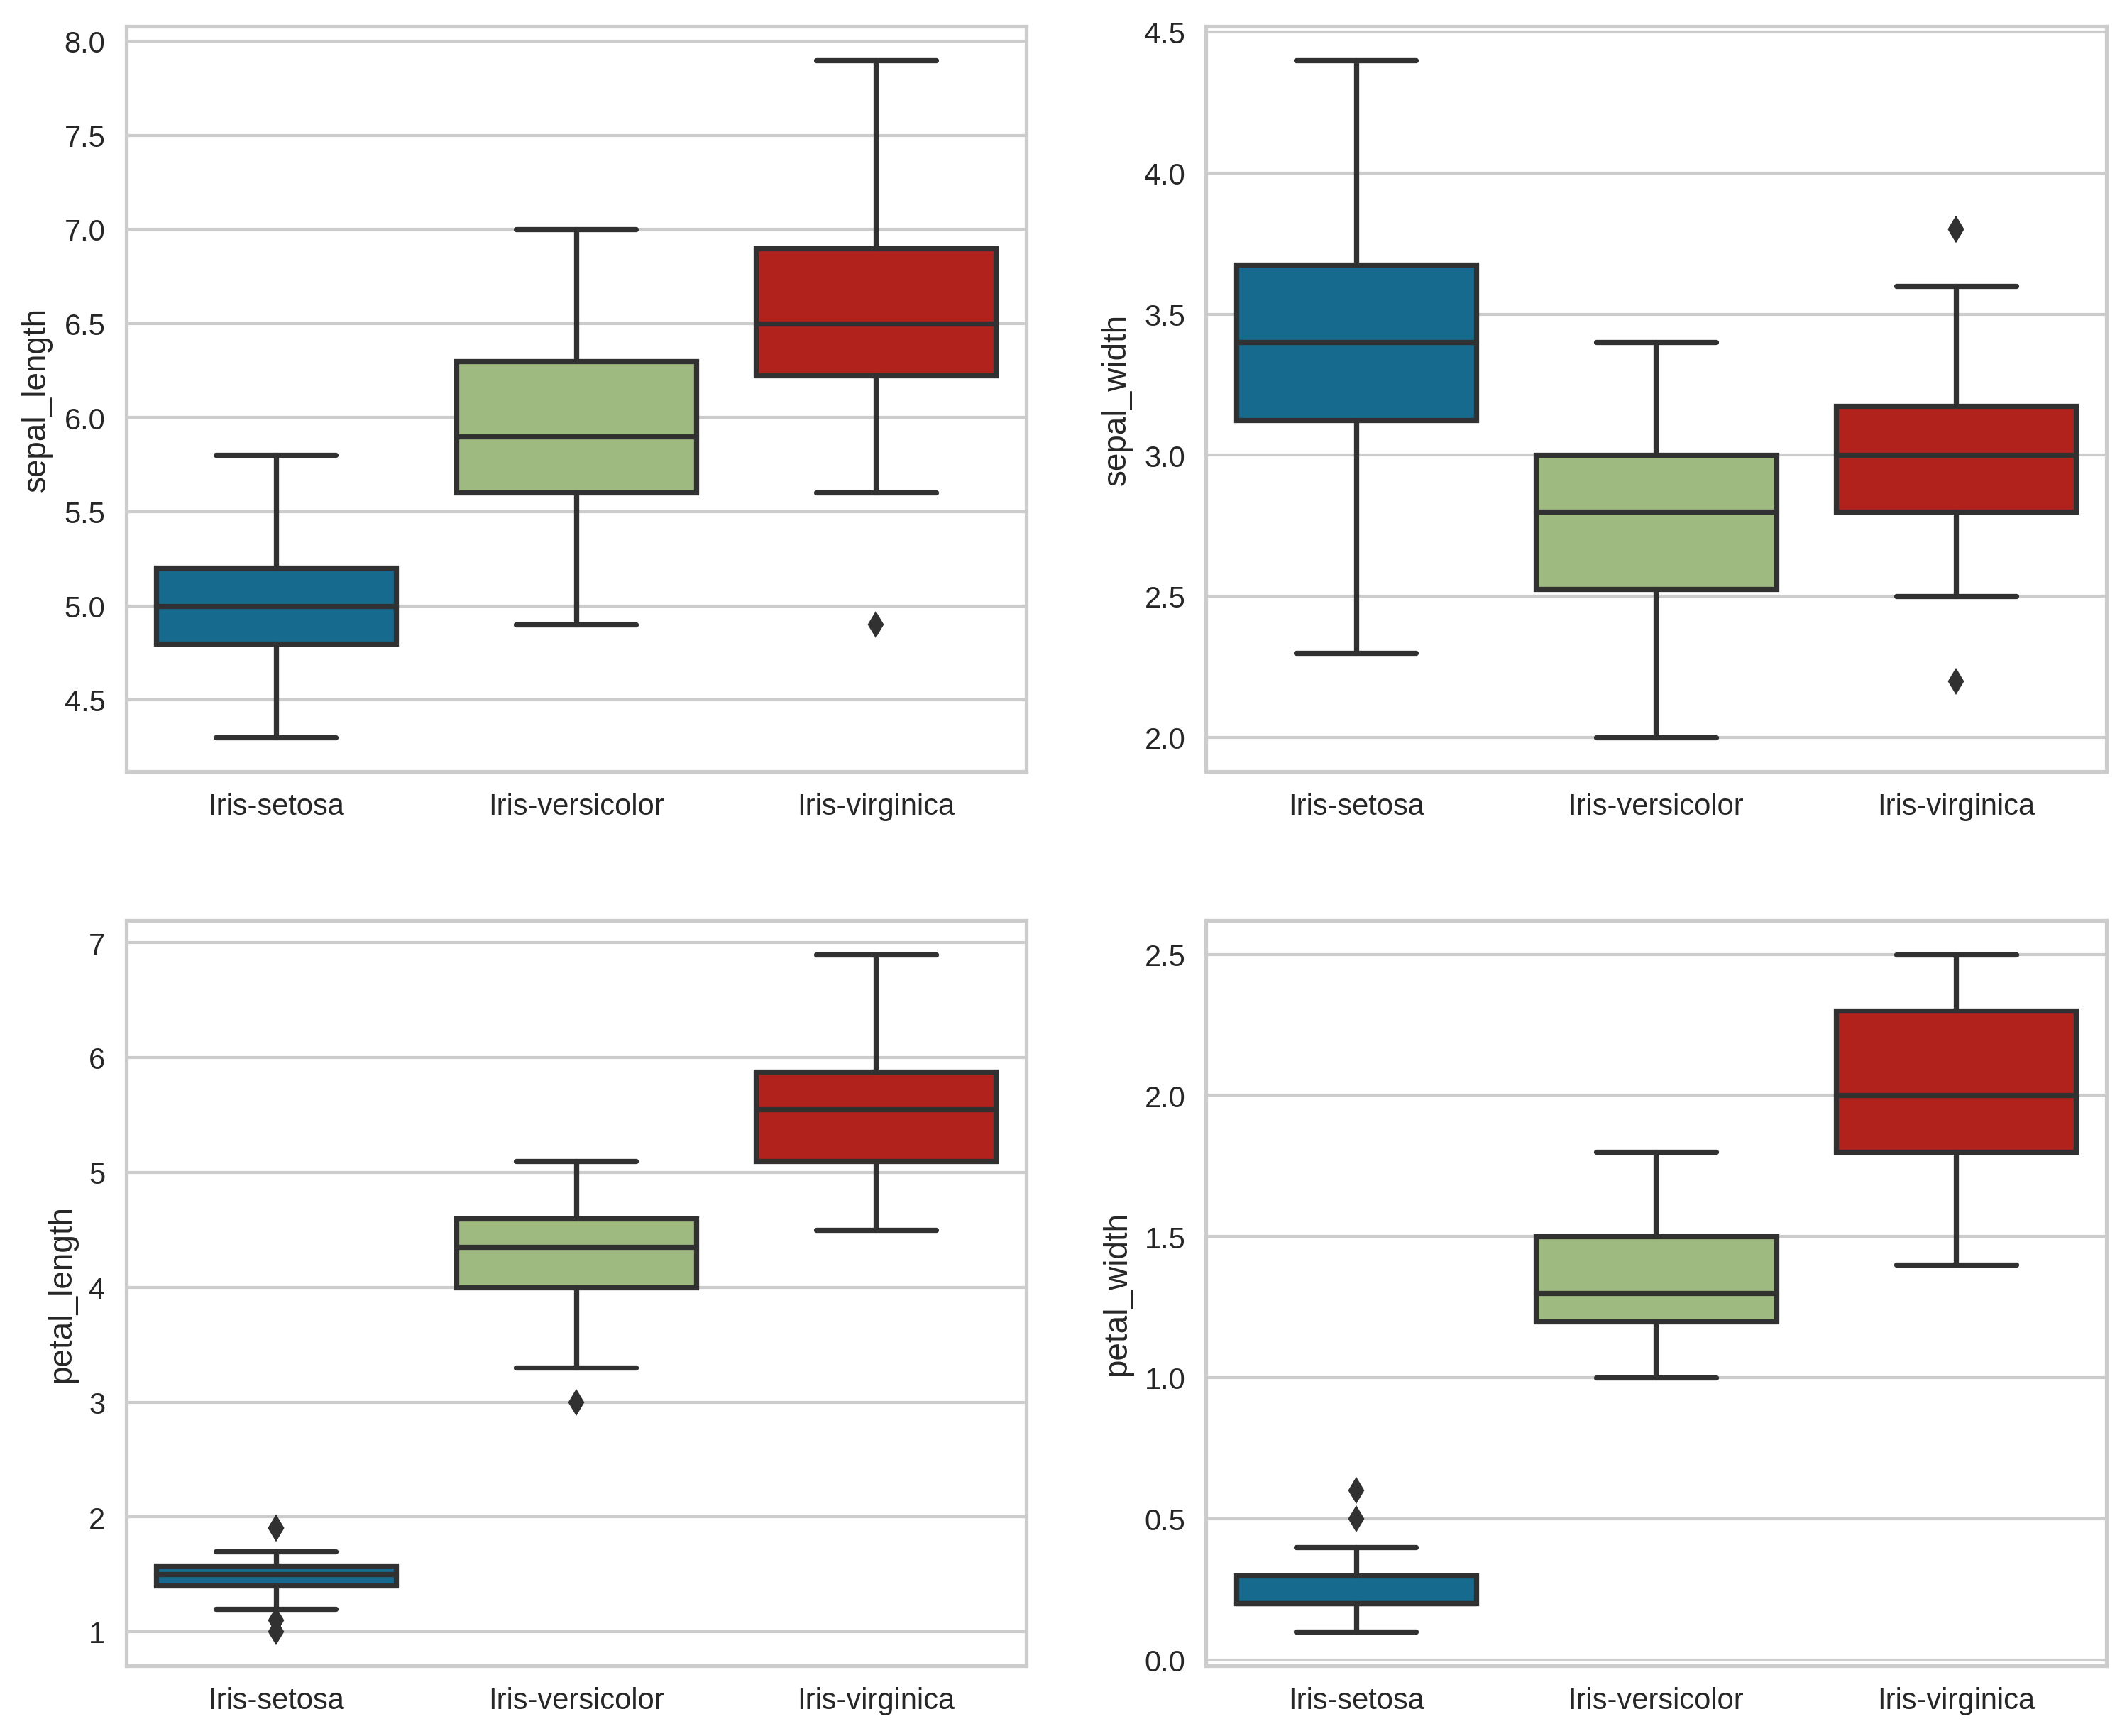

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
for ax, col in zip(axes.flatten(), data.columns) :
    sns.boxplot(data = data, x = 'species', y = col, ax = ax)
    ax.set_xlabel('')


. Evidently, each class has
a significantly different distribution, especially for the petal variables. Furthermore,
there are some outliers present, visualized as diamond symbols

## The Pearson correlation coefficient is a measure of correlation between two numeric variables. It has a value between -1 and 1, with 1 indicating a perfect linear relationship, and -1 indicating an inverse linear relationship.

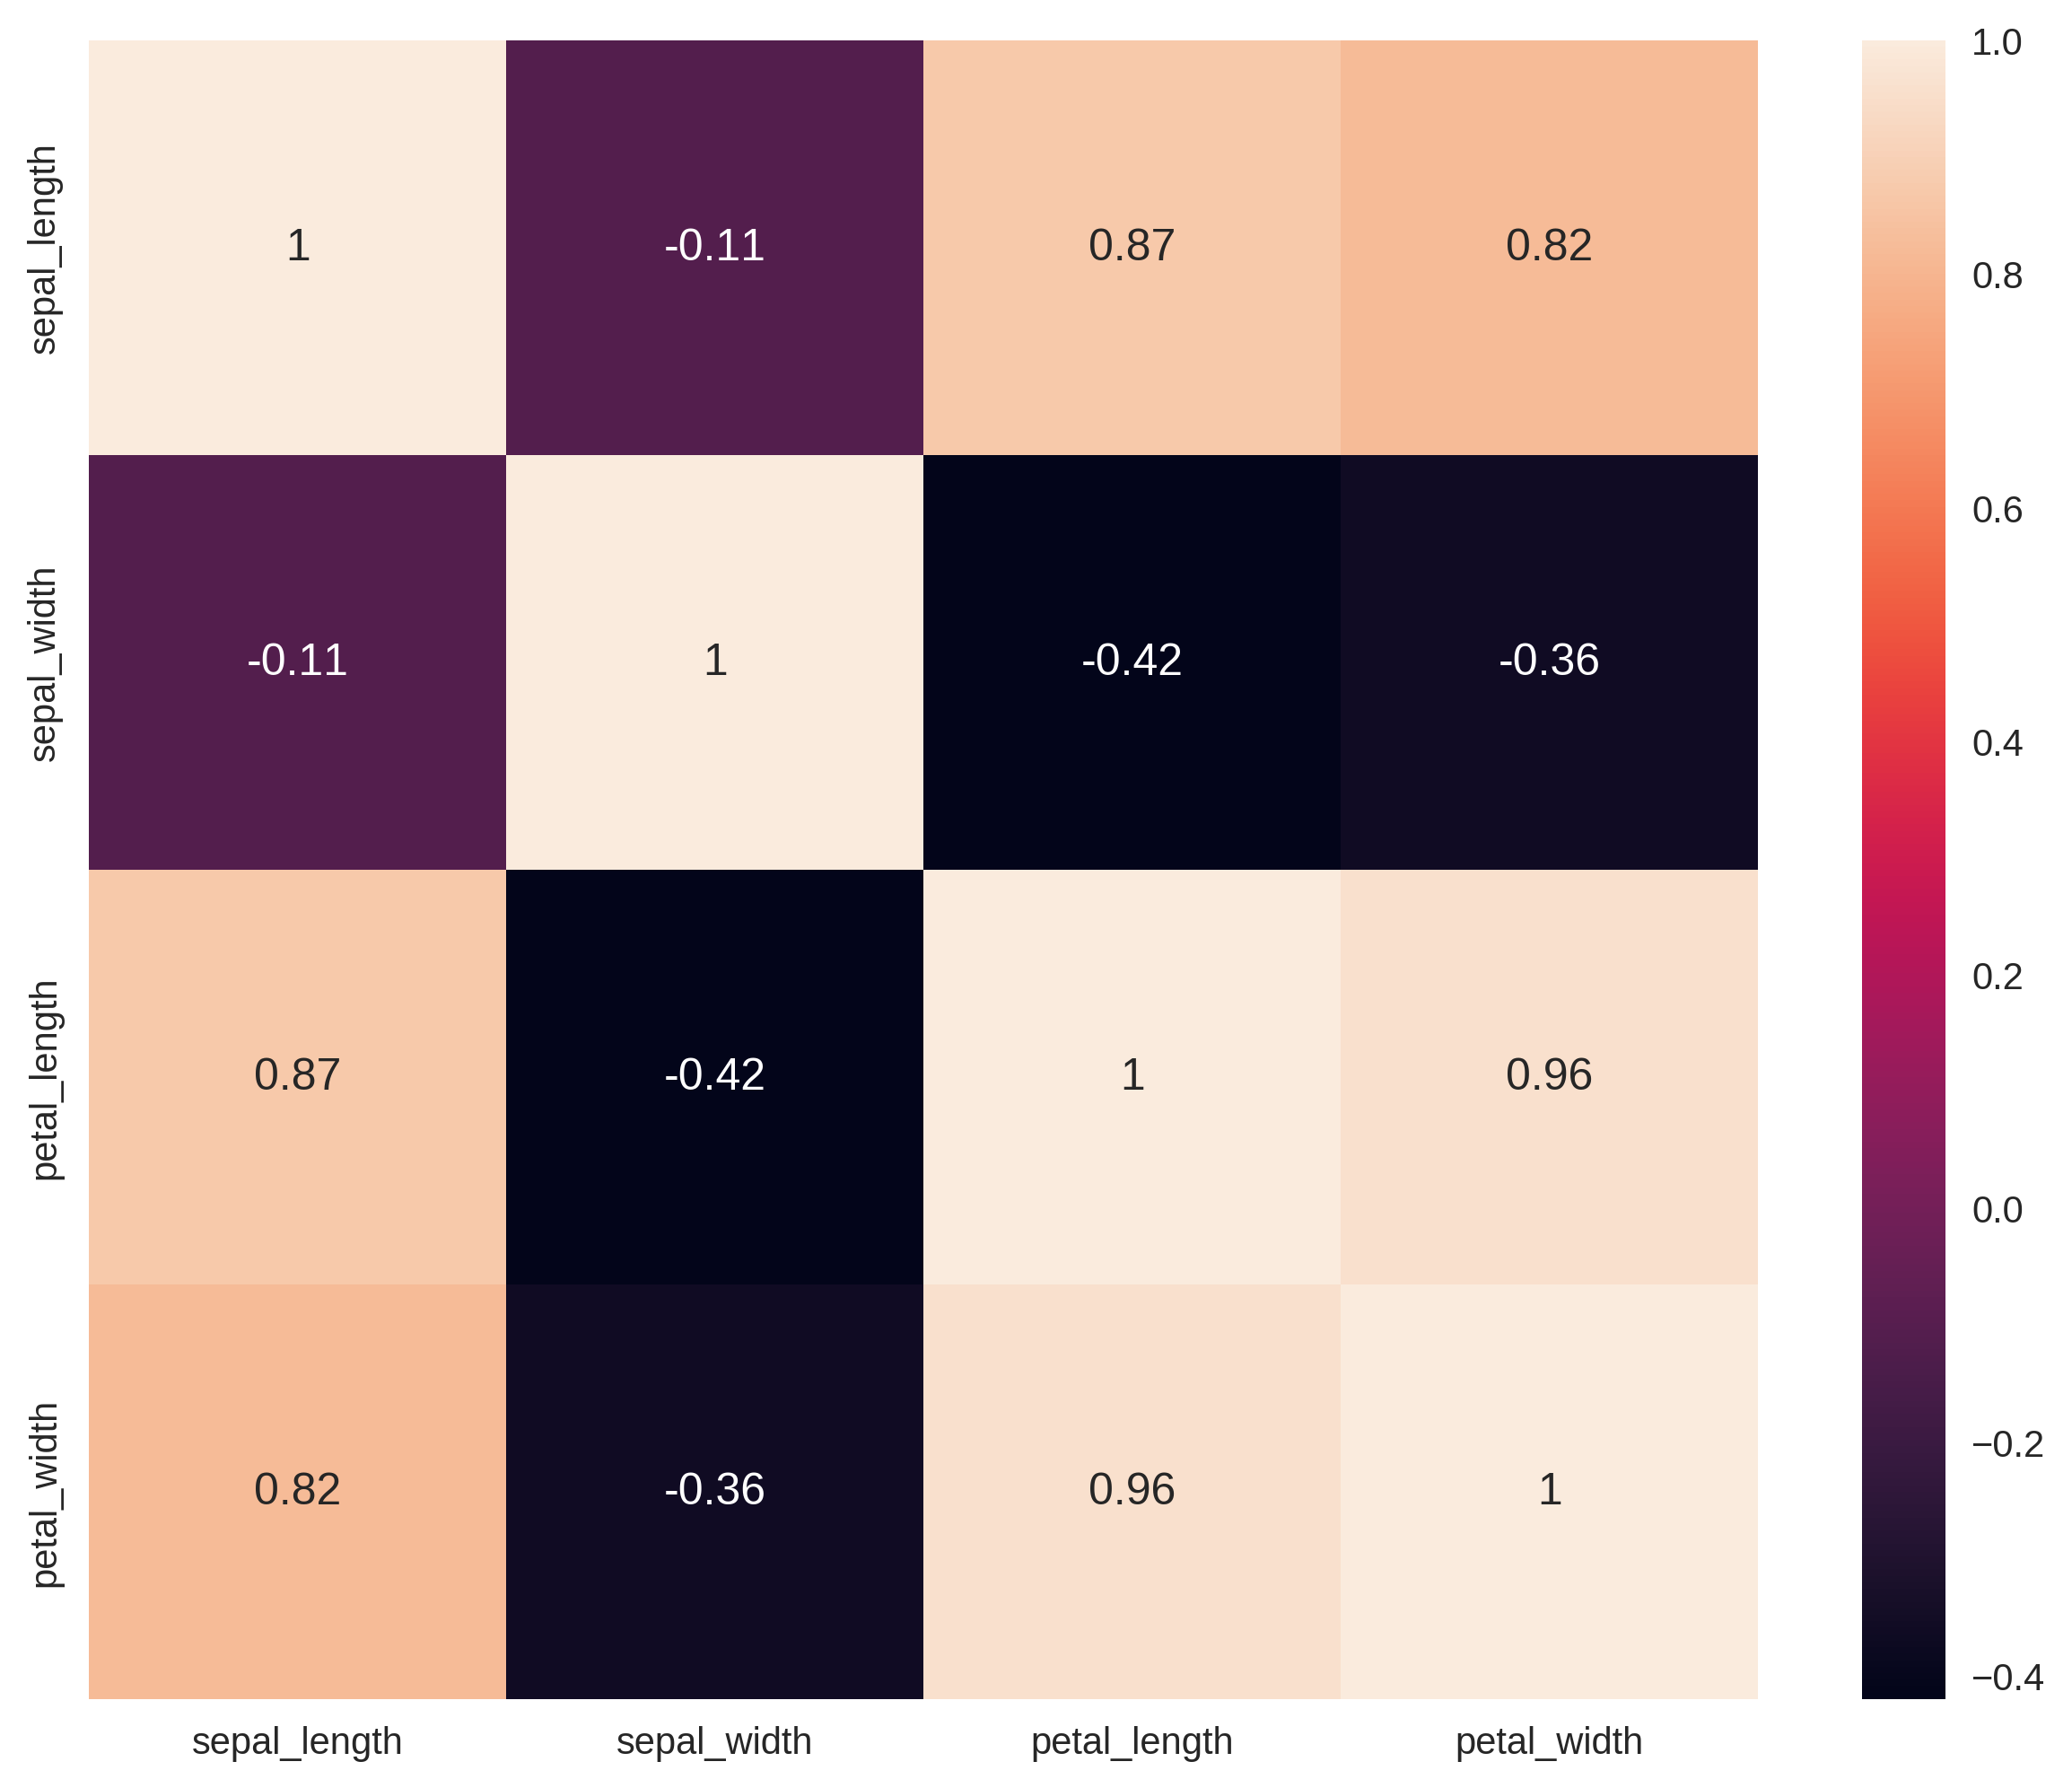

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

## we use the Seaborn heatmap() function to plot the correlationvalues as a color-encoded matrix. 

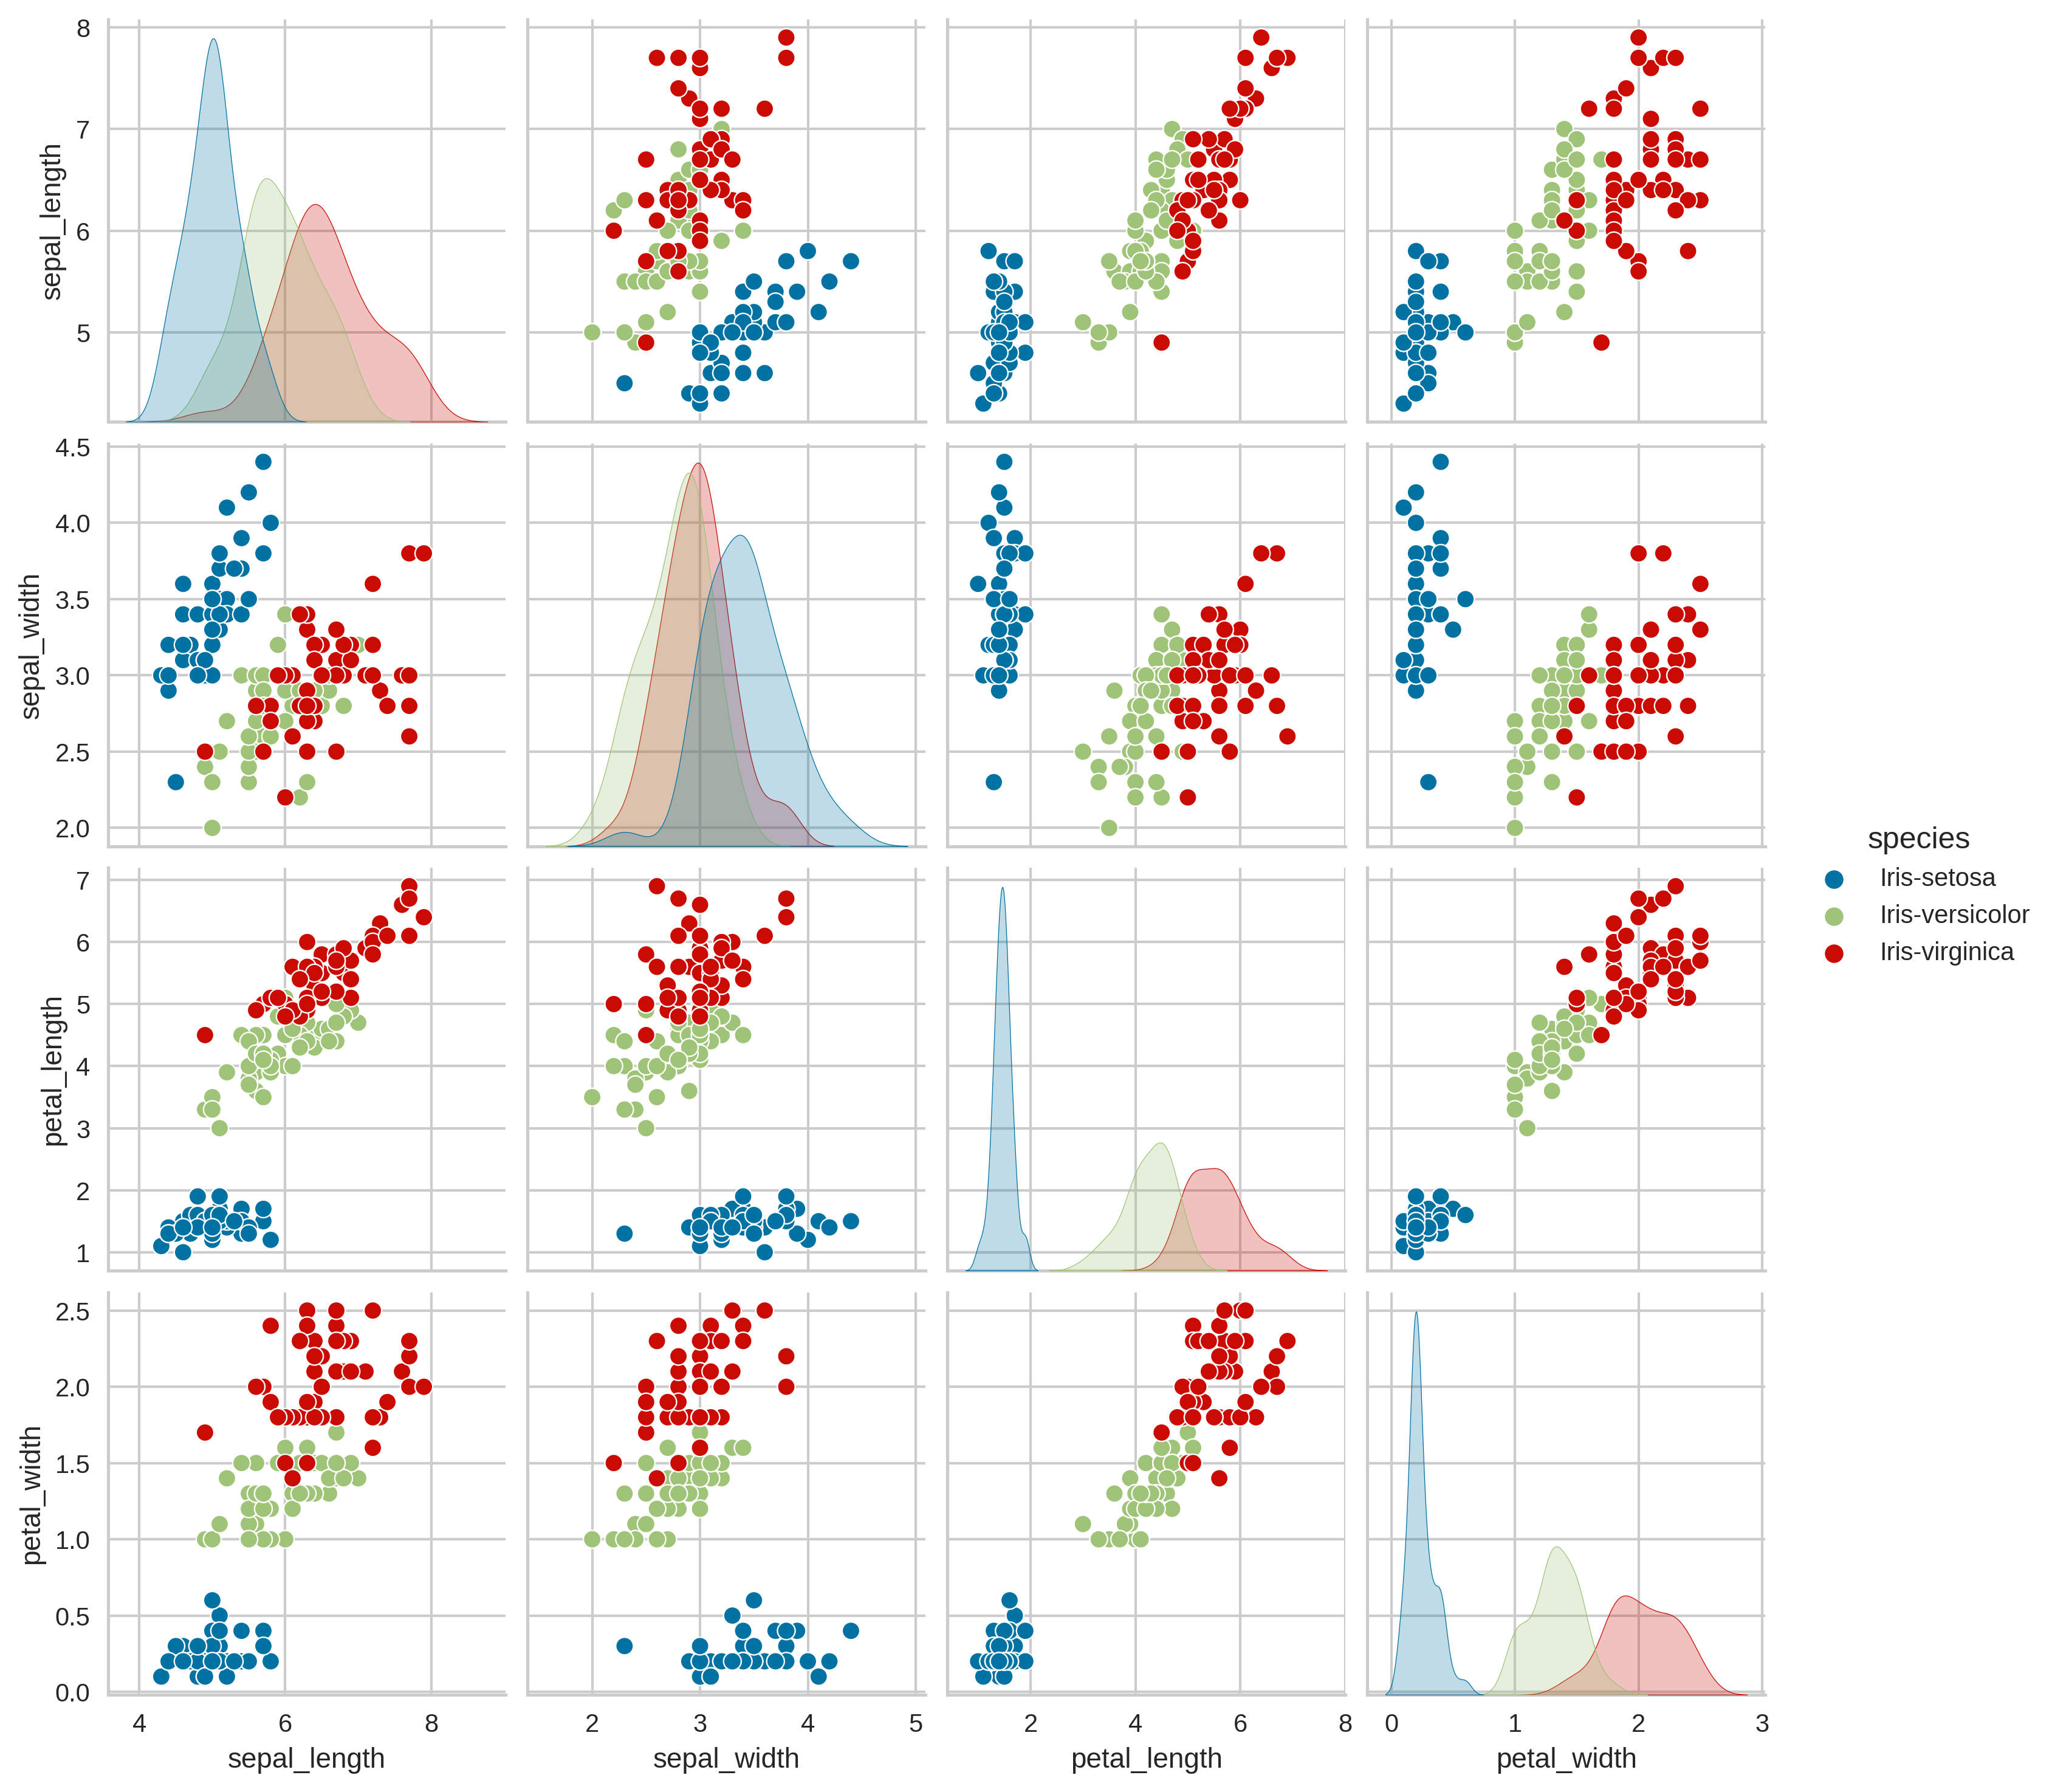

In [9]:
sns.pairplot(data, hue='species')
plt.show()

## Initializing the PyCaret Environment

In [10]:
classf = setup(data = data, target = 'species', train_size = 0.8,
normalize = True, session_id = 3934)

,Description,Value
0,Session id,3934
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(120, 5)"
7,Transformed test set shape,"(30, 5)"
8,Numeric features,4
9,Preprocess,True


Comparing Classification Models

In [11]:
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9833,1.0000,0.9833,0.9867,0.9831,0.9750,0.9769,0.0860
qda,Quadratic Discriminant Analysis,0.9750,1.0000,0.9750,0.9822,0.9738,0.9625,0.9668,0.0950
lr,Logistic Regression,0.9667,0.9979,0.9667,0.9733,0.9661,0.9500,0.9537,0.5220
knn,K Neighbors Classifier,0.9667,0.9979,0.9667,0.9756,0.9653,0.9500,0.9552,0.0970
gbc,Gradient Boosting Classifier,0.9667,0.9885,0.9667,0.9700,0.9664,0.9500,0.9519,0.7390
nb,Naive Bayes,0.9583,0.9938,0.9583,0.9689,0.9568,0.9375,0.9436,0.0840
et,Extra Trees Classifier,0.9583,0.9927,0.9583,0.9689,0.9568,0.9375,0.9436,0.5460
xgboost,Extreme Gradient Boosting,0.9583,0.9854,0.9583,0.9724,0.9540,0.9375,0.9462,0.1300
dt,Decision Tree Classifier,0.9500,0.9625,0.9500,0.9657,0.9455,0.9250,0.9346,0.0790
rf,Random Forest Classifier,0.9417,0.9917,0.9417,0.9467,0.9390,0.9125,0.9175,0.4940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

## Creating the Model

In [12]:
model = create_model('lda')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tuning the Model

In [13]:
model_cat = create_model('catboost', verbose = False)


params = {'iterations': np.arange(100, 1000, 100),
    'max_depth': np.arange(1, 10),
    'learning_rate': np.arange(0.01, 1, 0.01),
    'random_strength': np.arange(0.1, 1.0, 0.1),
    'l2_leaf_reg': np.arange(1, 100),
    'border_count': np.arange(1, 256)}


tuned_model = tune_model(model_cat, optimize = 'Accuracy', fold = 10,
    tuner_verbose = False, search_library = 'scikit-optimize',
    custom_grid = params, n_iter = 50)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.9792,0.9167,0.9333,0.9153,0.8750,0.8843
6,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
7,0.9167,0.9896,0.9167,0.9333,0.9153,0.8750,0.8843
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

## Making Predictions

In [14]:
predictions = predict_model(model)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9667,1.0000,0.9667,0.9697,0.9666,0.9500,0.9516


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
47,4.6,3.2,1.4,0.2,0,Iris-setosa,1.0000
9,4.9,3.1,1.5,0.1,0,Iris-setosa,1.0000
53,5.5,2.3,4.0,1.3,1,Iris-versicolor,0.9996
131,7.9,3.8,6.4,2.0,2,Iris-virginica,0.9994
109,7.2,3.6,6.1,2.5,2,Iris-virginica,1.0000
37,4.9,3.1,1.5,0.1,0,Iris-setosa,1.0000
57,4.9,2.4,3.3,1.0,1,Iris-versicolor,1.0000
31,5.4,3.4,1.5,0.4,0,Iris-setosa,1.0000
3,4.6,3.1,1.5,0.2,0,Iris-setosa,1.0000
141,6.9,3.1,5.1,2.3,2,Iris-virginica,0.9992


## Plotting the Model

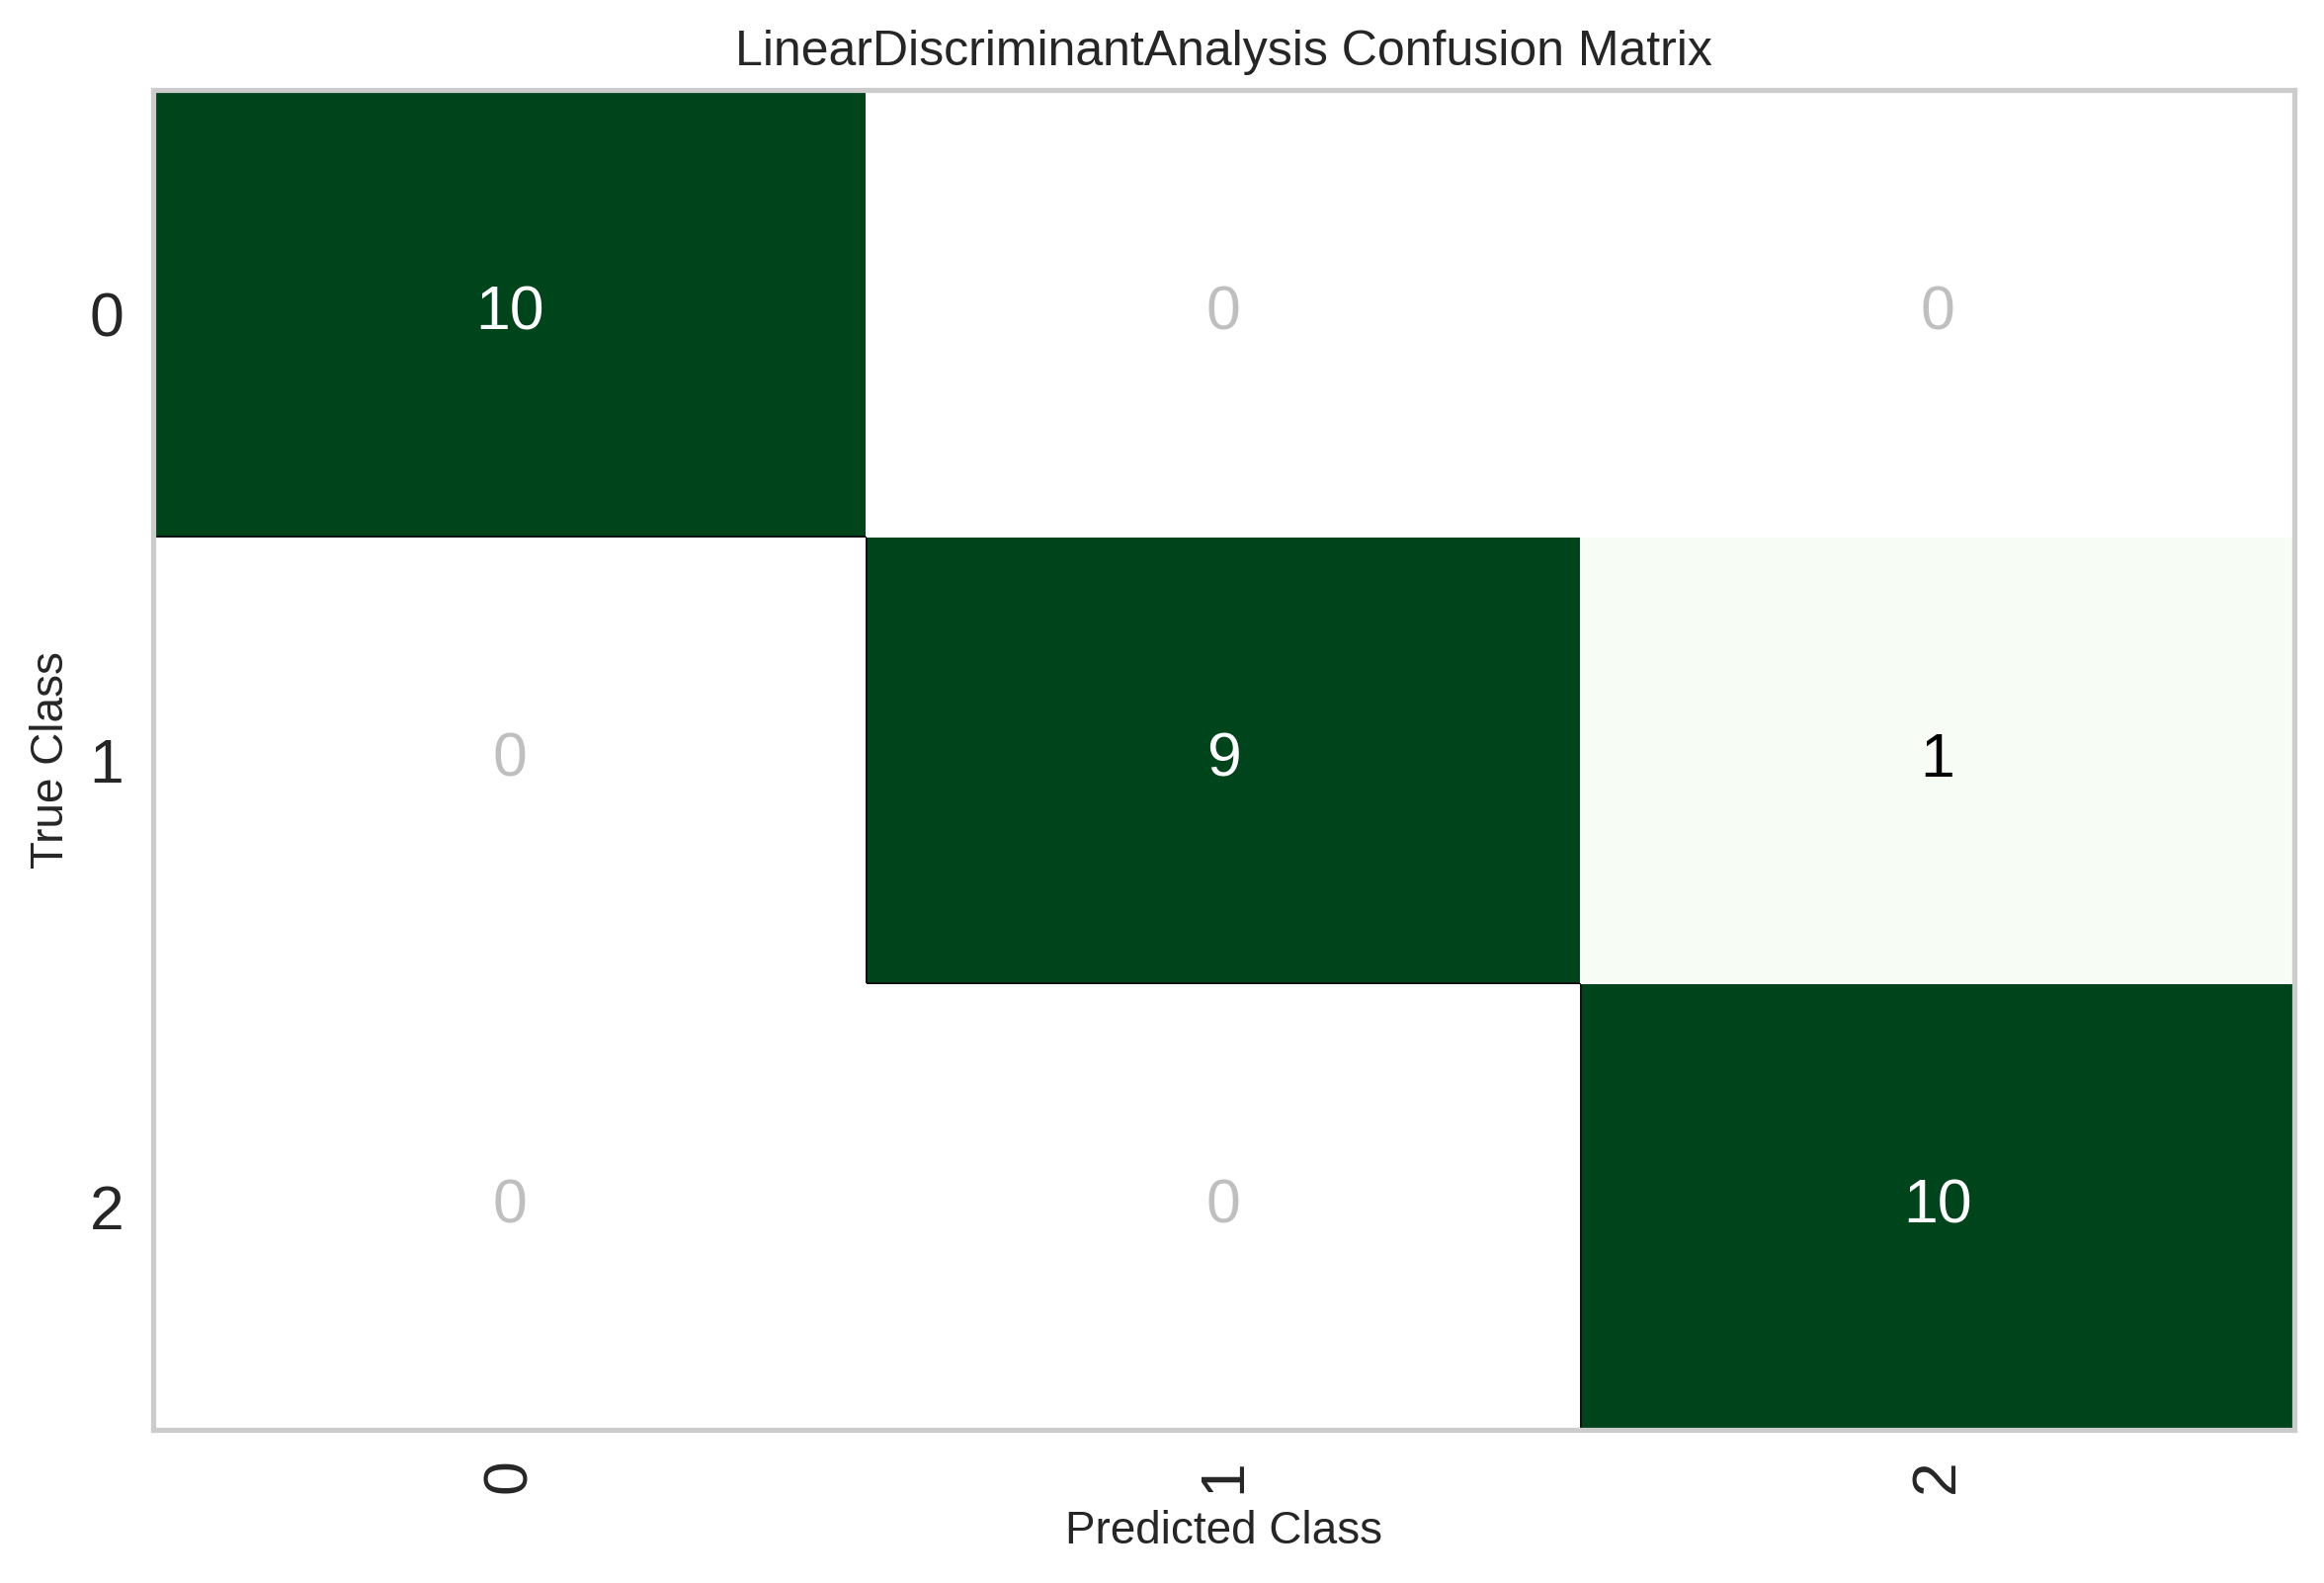

In [15]:
plot_model(model, 'confusion_matrix')

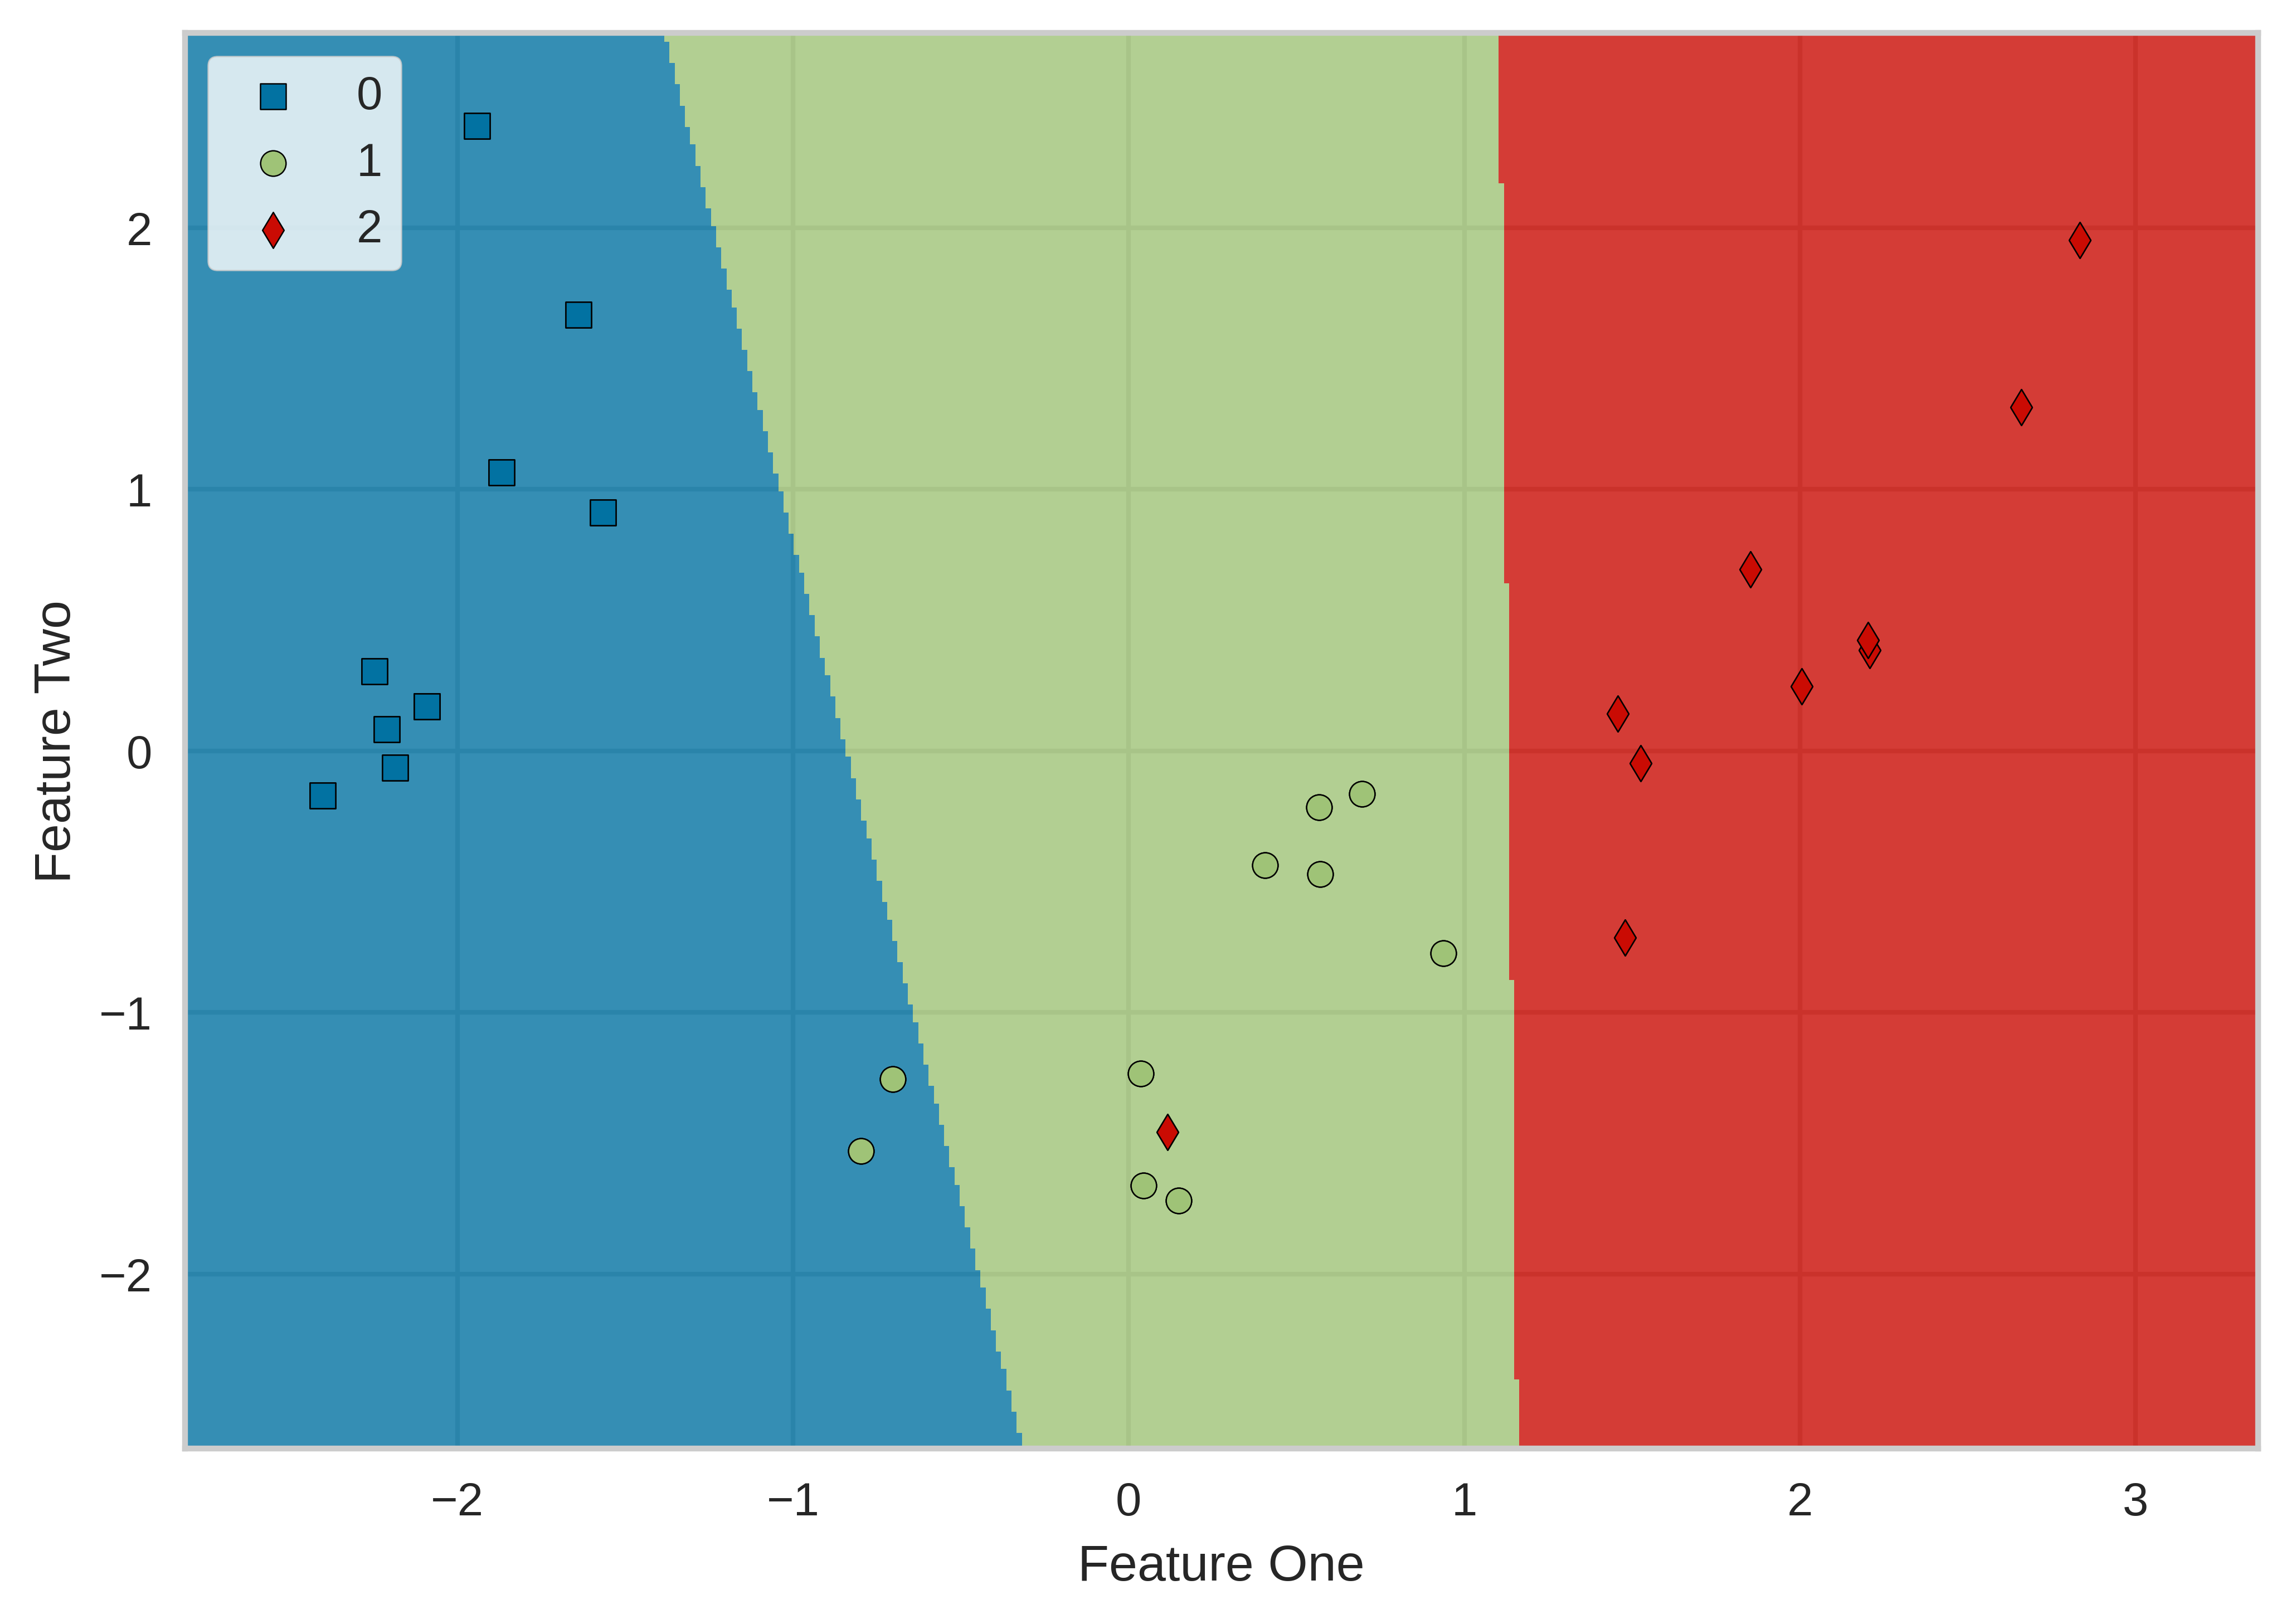

In [16]:
plot_model(model, 'boundary', scale = 2)

Finalizing and Saving the Model

In [17]:
final_model = finalize_model(model)

save_model(final_model, 'classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
  